**Mounted to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
from sklearn.preprocessing import OneHotEncoder
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

**Reading\Loading the Data set**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Heart Disease data.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Checking for Missing\NULL values :**
"No NULL Values found in the data"

In [ ]:
data.duplicated().sum()

723

**Checking for Duplicate Values :** "723 Duplicate values are identified in the Dataset"

**Checking the Data Type**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Checking the number of unique values of each columns**

In [ ]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

**Checking the statistics of the dataset**

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Printing the First 5 rows & Last 5 rows from the Dataset**

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


**Seperating numerical and categorical features**

In [ ]:
numerical_features=[feature for feature in data.columns if
data[feature].dtype!='O']
categorical_feature=[feature for feature in data.columns if
data[feature].dtype=='O']

In [ ]:
numerical_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
categorical_feature

[]

**Plotting AGE Distribution**

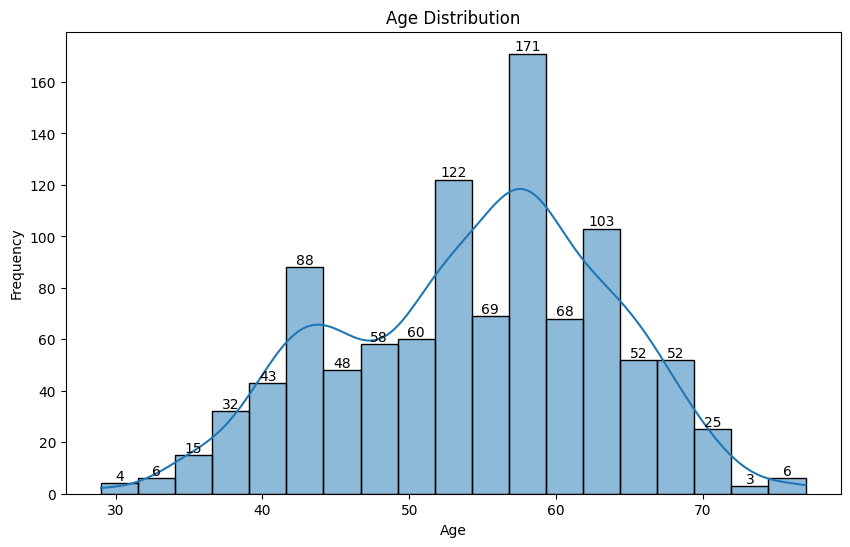

In [ ]:
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
for p in histplot.patches:
    height = p.get_height()
    if height > 0:
        histplot.annotate(f'{height:.0f}',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points')
plt.show()

**Plotting Cholesterol Level Distribution**

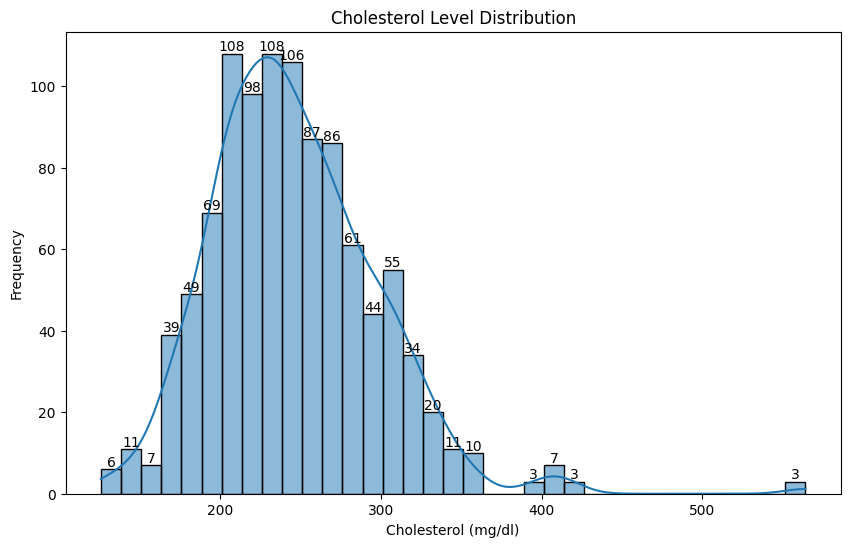

In [ ]:
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data['chol'], kde=True)
plt.title('Cholesterol Level Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')
for p in histplot.patches:
    height = p.get_height()
    if height > 0:
        histplot.annotate(f'{height:.0f}',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points')
plt.show()

**Representing Heart Disease Distribution by Gender**

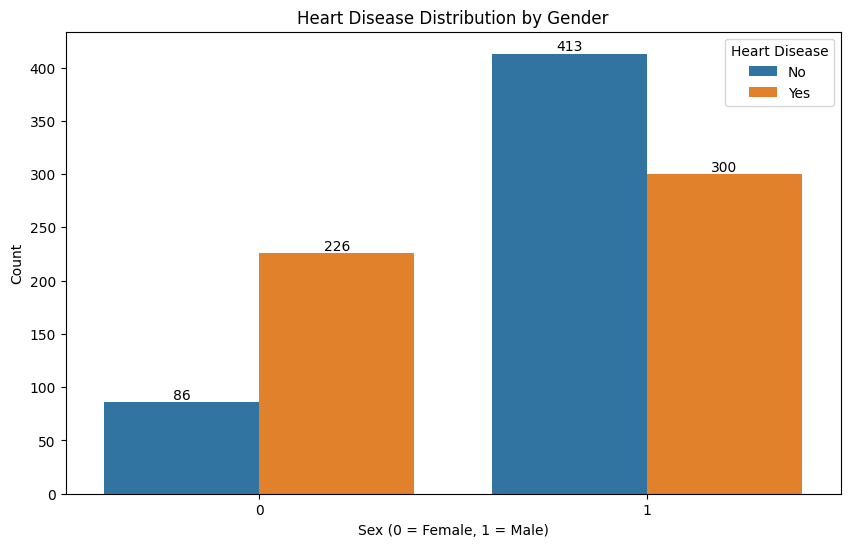

In [29]:
plt.figure(figsize=(10, 6))
countplot = sns.countplot(x='sex', hue='target', data=data)
plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
for p in countplot.patches:
    height = p.get_height()
    if height > 0:
        countplot.annotate(f'{height:.0f}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center',
                           xytext=(0, 5),
                           textcoords='offset points')
plt.show()

**Representing Heart Disease Distribution by Age Group**

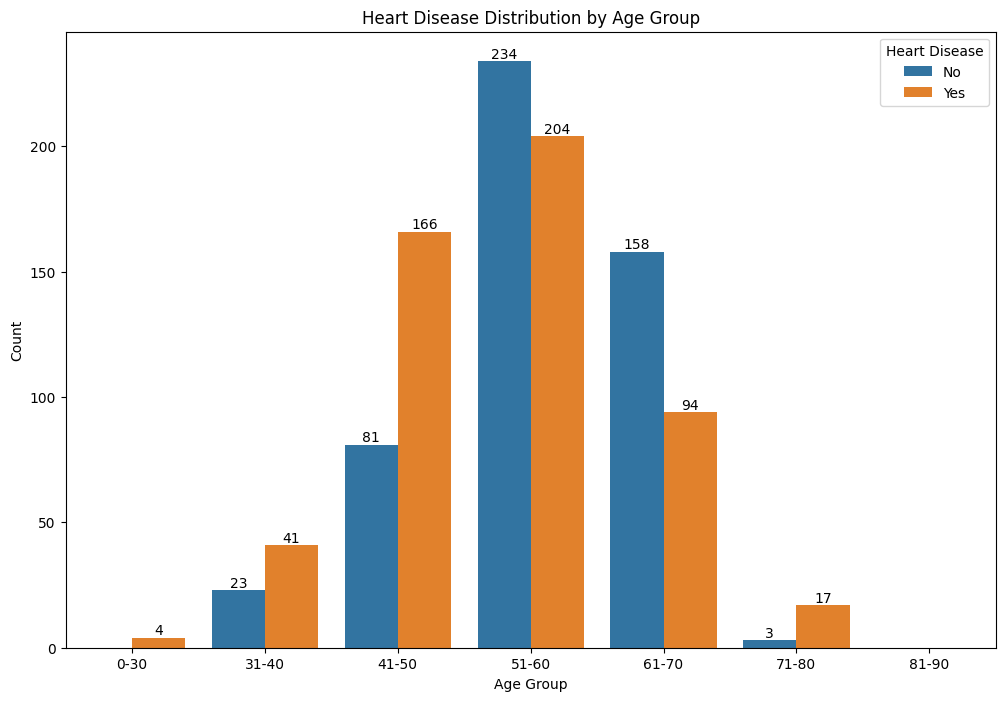

In [30]:
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90],
                           labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])
plt.figure(figsize=(12, 8))
countplot = sns.countplot(x='age_group', hue='target', data=data)
plt.title('Heart Disease Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
for p in countplot.patches:
    height = p.get_height()
    if height > 0:
        countplot.annotate(f'{height:.0f}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center',
                           xytext=(0, 5),
                           textcoords='offset points')
plt.show()

**Using some Machine Learning Models**

In [31]:
def train_model(data):
    X = data.drop(columns=['target'])
    y = data['target']
    # One-hot encode categorical variables
    categorical_columns = X.select_dtypes(include=['category']).columns
    X = pd.get_dummies(X, columns=categorical_columns,
    drop_first=True)
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=42)
    # Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    # Predictions
    y_pred = model.predict(X_test)
    # Evaluation
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
train_model(data)

Accuracy: 0.7902439024390244
Confusion Matrix:
 [[73 29]
 [14 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.77       102
           1       0.75      0.86      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205

